# IPL DATA ANALYSIS (2023 DATASET)


## 1. Introduction
- Tujuan analisis: memahami komposisi pemain IPL 2023, biaya, dan distribusi antar tim.
- Pertanyaan utama yang ingin dijawab:
  - Bagaimana kualitas data? (missing values, duplicates)
  - Bagaimana distribusi biaya pemain?
  - Tim mana yang paling mahal/hemat?
  - Perbedaan pemain lokal vs asing?
  - Apakah tipe pemain tertentu lebih mahal?

## 2. Data Loading
- Source : IPL 2023 Dataset (Kaggle)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import os
from dataset_explorer import dataset_editor
import numpy as np

In [2]:
file_loc = "D:/Projects/Belajar_Data_Science/Project_menarik/IPL Analysis/archive/ipl_2023_dataset.csv"

In [3]:
from sklearn.preprocessing import OneHotEncoder

class models(dataset_editor):
    fig_size = (5, 10)
    pallete = "viridis"
    def __init__(self, file_location):
        super().__init__(file_location)

    @dataset_editor.location.setter
    def location(self, path):
        if not os.path.exists(path):
            raise FileNotFoundError(f"❌ File not found: {path}")
        try:
            file_extension = os.path.splitext(path)[1].lower()
            if file_extension in (".xlsx", ".xls", ".xlsm", ".xlsb", ".odf", ".ods", ".odt"):
                self.dataframe = pd.read_excel(path)
            elif file_extension == ".csv":
                self.dataframe = pd.read_csv(path)
        except Exception as e:
            raise ValueError(f"❌ Failed to read file with pandas: {e}")
        self._location = path
        print(f"✅ Loaded file: {path}")
        
    @staticmethod
    def fillna(dataframe, drop_original: bool = True):
        from sklearn.preprocessing import OneHotEncoder
    
        # Isi NaN di kolom numerik
        missing_cols = dataframe.columns[dataframe.isna().any()].tolist()
    
        for col in missing_cols:
            if pd.api.types.is_numeric_dtype(dataframe[col]):
                dataframe[col] = dataframe[col].fillna(dataframe[col].mean())
                print(f"✅ Numeric column '{col}' filled with mean.")
    
        # Drop rows with NaN in categorical columns (tidak diisi dengan 'Unknown')
        s = (dataframe.dtypes == 'object')
        object_cols = list(s[s].index)
        dataframe.dropna(subset=object_cols, inplace=True)
    
        print("Categorical variables:")
        print(object_cols)
        print('No. of. categorical features: ', len(object_cols))
    
        OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataframe[object_cols]))
        OH_cols.index = dataframe.index
        OH_cols.columns = OH_encoder.get_feature_names_out()
    
        dataframe.drop(object_cols, axis=1, inplace=True)
        dataframe[OH_cols.columns] = OH_cols
        dataframe = dataframe
        return dataframe.head()  
        # print("✅ All categorical columns one-hot encoded with sklearn. Rows with NaN in categorical columns dropped.")

    def __str__(self):
        return "this is a class for creating a model that can be applied to your dataframe"
    def __repr__(self):
        return "models({})".format(self.location)

In [4]:
os.path.exists(file_loc)

True

In [5]:
ipl = models(file_loc)
ipl.dataframe.head()

✅ Loaded file: D:/Projects/Belajar_Data_Science/Project_menarik/IPL Analysis/archive/ipl_2023_dataset.csv


,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


In [6]:
ipl.categorize()

Categorical variables: 5
List of Categorical Column:
 - Player Name
 - Base Price
 - Type
 - 2022 Squad
 - 2023 Squad

Integer variables: 0
List of INT Columns:

Float variables: 2
List of FLOAT Columns:
 - Cost in Rs. (CR)
 - Cost in $ (K)


## 3. Data Cleaning
### 3.1 Duplicate Value

In [7]:
ipl.dataframe[ipl.dataframe['Player Name'] == 'Akash Singh']

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
316,Akash Singh,2000000,BOWLER,NaN,NaN,NaN,Unsold
362,Akash Singh,2000000,BATSMAN,NaN,NaN,NaN,Unsold


In [8]:
ipl.dataframe[ipl.dataframe['Player Name'] == 'Shivam Sharma']

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
326,Shivam Sharma,2000000,BOWLER,NaN,NaN,NaN,Unsold
542,Shivam Sharma,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [9]:
ipl.dataframe[ipl.dataframe['Player Name'] == 'Prince Yadav']

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
393,Prince Yadav,2000000,BOWLER,NaN,NaN,NaN,Unsold
534,Prince Yadav,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold


#### Duplicate:
* There are 3 duplicate player names

### 3.2 Missing Value
- Quantity and Percentage of missing values for every column
- Visualize the missing value.
- Decision: drop / fill / keep.

🧼 Missing Value Summary:

 - Cost in Rs. (CR): 325 missing (57.22%)
 - Cost in $ (K): 325 missing (57.22%)
 - 2022 Squad: 338 missing (59.51%)


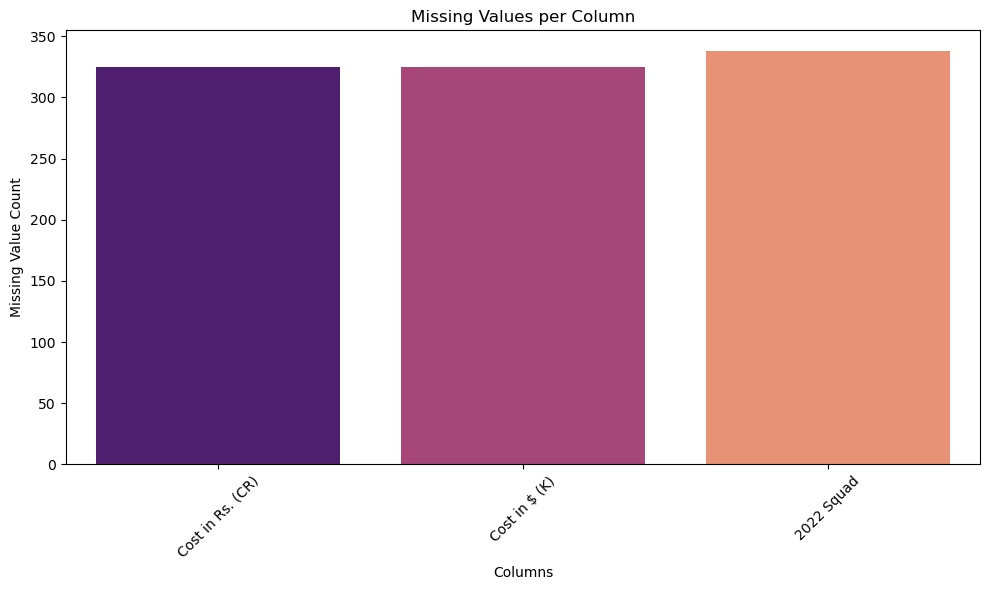

Cost in Rs. (CR)    325
Cost in $ (K)       325
2022 Squad          338
dtype: int64

In [10]:
models.show_na(dataframe = ipl.dataframe, show_plot = True)

In [11]:
ipl.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player Name       568 non-null    object 
 1   Base Price        568 non-null    object 
 2   Type              568 non-null    object 
 3   Cost in Rs. (CR)  243 non-null    float64
 4   Cost in $ (K)     243 non-null    float64
 5   2022 Squad        230 non-null    object 
 6   2023 Squad        568 non-null    object 
dtypes: float64(2), object(5)
memory usage: 31.2+ KB


#### Nan / Missing :

    - There are 325 records with no value for 'Cost in Rs. (CR)'.

    - There are 325 records with no value for 'Cost in $ (K)'.

    - There are 338 records with no value for '2022 Squad'.

#### Drop Duplicate

In [12]:
ipl.dataframe.drop_duplicates(subset = ['Player Name'], inplace = True, keep = 'last')

In [13]:
ipl.cat_feature(visual = False)

Player Name
Prenelan Subrayen    1
Shivam Mavi          1
Joshua Little        1
Kane Williamson      1
K.S. Bharat          1
                    ..
Rashid Khan          1
Pradeep Sangwan      1
Rahul Tewatia        1
Urvil Patel          1
Odean Smith          1
Name: count, Length: 565, dtype: int64  

Base Price
2000000     271
Retained    163
5000000      61
10000000     20
20000000     19
1500000      10
7500000       9
4000000       7
3000000       4
15000000      1
Name: count, dtype: int64  

Type
ALL-ROUNDER     213
BOWLER          186
BATSMAN          91
WICKETKEEPER     75
Name: count, dtype: int64  

2022 Squad
MI      28
PBKS    24
RR      24
CSK     24
DC      23
KKR     22
SRH     22
GT      22
LSG     21
RCB     20
Name: count, dtype: int64  

2023 Squad
Unsold    322
CSK        25
GT         25
DC         25
LSG        25
RCB        25
RR         25
SRH        25
MI         24
KKR        22
PBKS       22
Name: count, dtype: int64  



#### KEEP MISSING VALUES IN 'Cost in Rs. (CR)' AND 'Cost in $ (K)'
* 277 players do not have any information about their 2022 team and 'Unsold' in 2023
* We can still use the data for analyses related to their squad and position.

In [14]:
# Missing value in '2022 Squad', Unsold in '2023 Squad', both

missing_both = ((ipl.dataframe['2022 Squad'].isna()) & (ipl.dataframe['2023 Squad'] == 'Unsold'))
missing_2022 = ((ipl.dataframe['2022 Squad'].isna()))
unsold_2023 = ((ipl.dataframe['2023 Squad']) == 'Unsold')

var = {'both' :missing_both.value_counts().iloc[1], 'missing 2022' : missing_2022.value_counts().iloc[1], 'unsold 2023' : unsold_2023.value_counts().iloc[1]} 

In [15]:
values_list = [val for val in var.values()]
keys_list = [key for key in var.keys()]

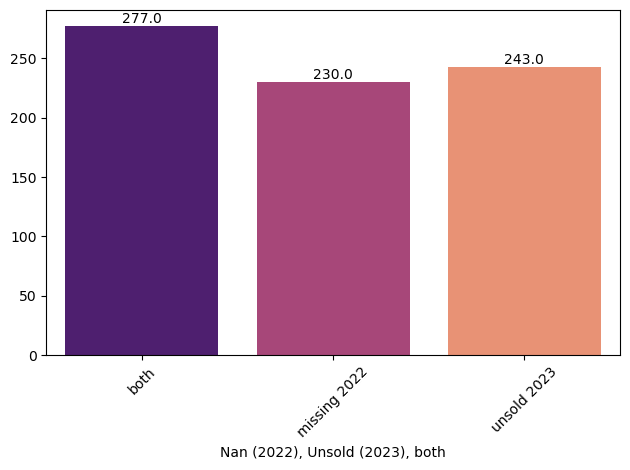

In [16]:
ax = sns.barplot(x = keys_list, y = values_list, hue= keys_list, palette = 'magma')
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height()}',
            ha='center', va='bottom')
plt.xticks(rotation=45)
plt.xlabel("Nan (2022), Unsold (2023), both")
plt.tight_layout()


### 3.2 Manipulate The Value

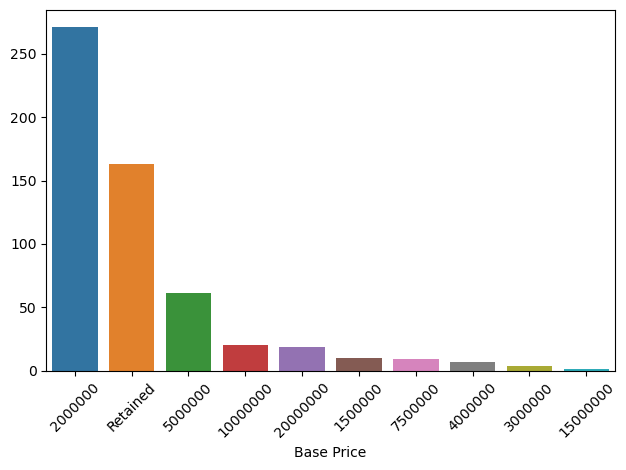

In [17]:
counts = ipl.dataframe['Base Price'].value_counts()
sns.barplot(x = counts.index, y = counts.values, hue= counts.index)
plt.xticks(rotation=45)
plt.tight_layout()

In [18]:
ipl.dataframe['Base Price'] = np.where(ipl.dataframe['Base Price']=='Retained',0,ipl.dataframe['Base Price']).astype('float')

In [19]:
ipl.categorize()

Categorical variables: 4
List of Categorical Column:
 - Player Name
 - Type
 - 2022 Squad
 - 2023 Squad

Integer variables: 0
List of INT Columns:

Float variables: 3
List of FLOAT Columns:
 - Base Price
 - Cost in Rs. (CR)
 - Cost in $ (K)


#### Change Retained Value to 0 

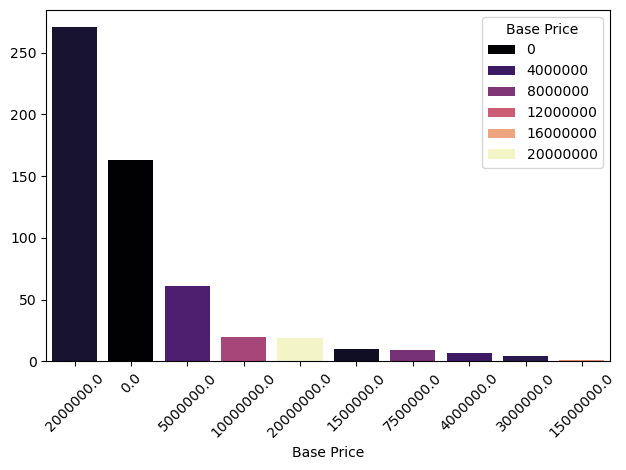

In [20]:
counts = ipl.dataframe['Base Price'].value_counts()
sns.barplot(x = counts.index, y = counts.values, hue= counts.index, palette = 'magma', order= counts.sort_values(ascending = False).index)
plt.xticks(rotation=45)
plt.tight_layout()

#### Convert 'Base Price' into crores by dividing it by 10,000,000. 

In [21]:
ipl.dataframe['Base Price'] = ipl.dataframe['Base Price']/10000000

Base Price
0.20    271
0.00    163
0.50     61
1.00     20
2.00     19
0.15     10
0.75      9
0.40      7
0.30      4
1.50      1
Name: count, dtype: int64

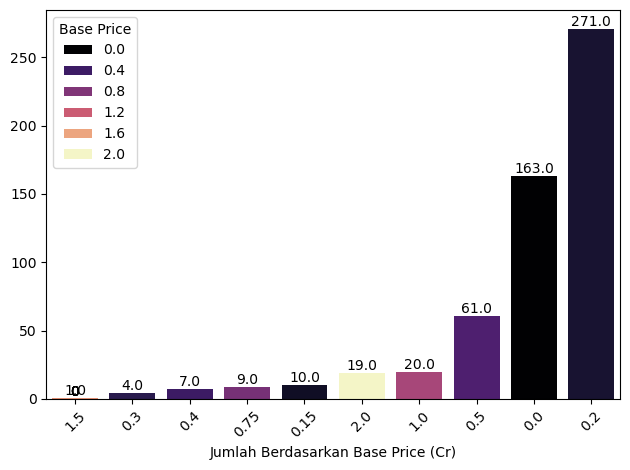

In [22]:
# Change Retained to 0 
counts = ipl.dataframe['Base Price'].value_counts()
ax = sns.barplot(x = counts.index, y = counts.values, hue= counts.index, palette = 'magma', order= counts.sort_values(ascending = True).index)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height()}',
            ha='center', va='bottom')
plt.xticks(rotation=45)
plt.xlabel("Jumlah Berdasarkan Base Price (Cr)")
plt.tight_layout()

counts

## 4. Exploratory Data Analysis (EDA)


### 4.1 Unique Value and Pairplot

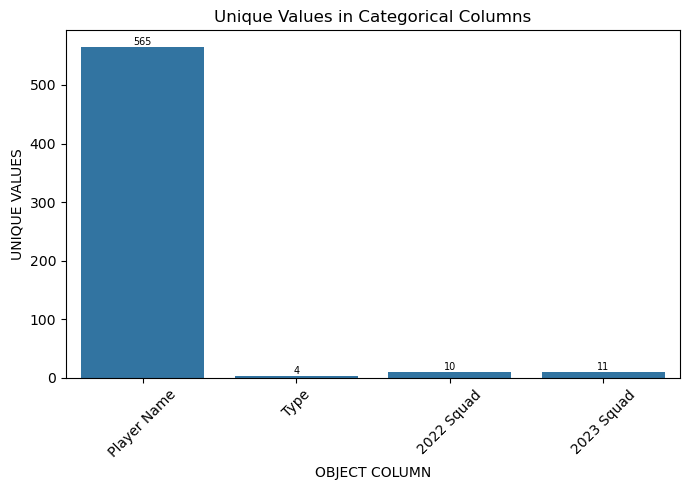

In [23]:
ipl.unique_val(fig_size = (7,5))

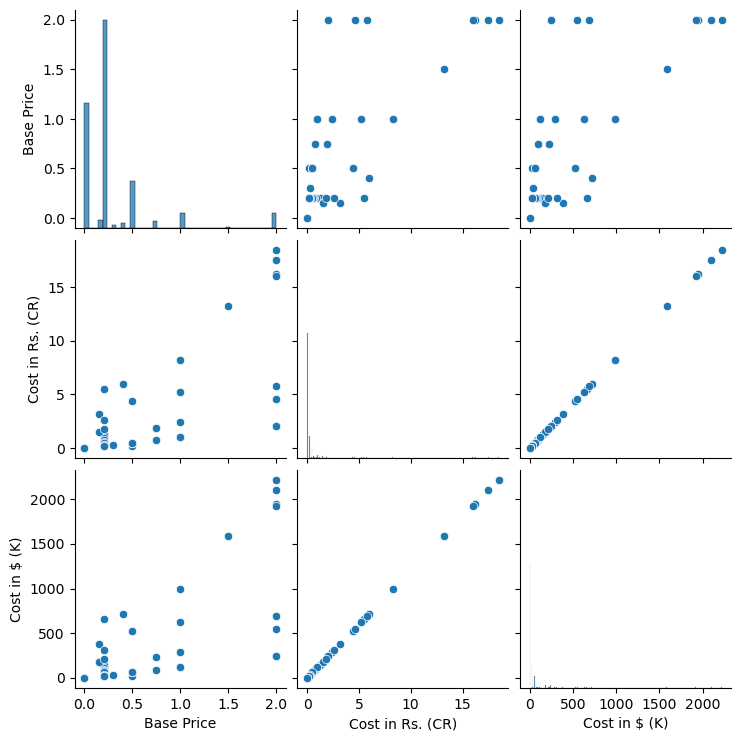

In [24]:
_int = (ipl.dataframe.dtypes == 'float')
int_cols = _int[_int].index
int_cols
sns.pairplot(ipl.dataframe)

* 'Cost in Rs. (CR)' has a linear relationship with 'Cost in $ (K)'

### 4.2 Player Cost Analysis

* The majority of players have a price below 3.0 Cr.

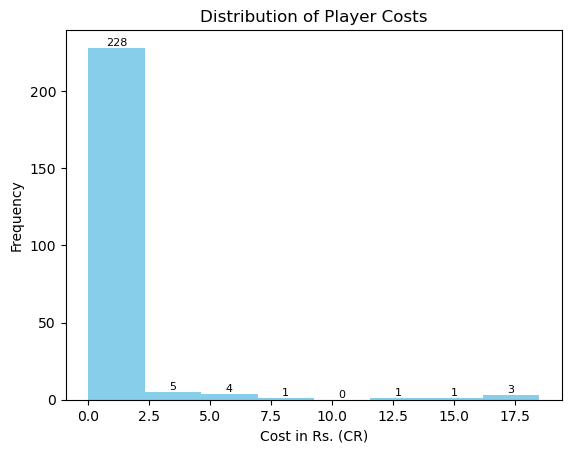

In [25]:
# Membuat histogram
counts, bins, patches = plt.hist(ipl.dataframe['Cost in Rs. (CR)'], 
                                bins=8, 
                                color="skyblue", 
                                ec='blue')

# Menambahkan label pada setiap bar
plt.bar_label(patches, labels=counts.astype(int), fontsize=8)

plt.xlabel('Cost in Rs. (CR)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Costs')
plt.show()


#### Distribution of 'Cost in Rs. (Cr)' and 'Cost in $ (K)'

In [26]:
player_dis_cr = ipl.dataframe.groupby('Cost in Rs. (CR)').agg({'Player Name':'count'})
player_dis_K = ipl.dataframe.groupby('Cost in $ (K)').agg({'Player Name':'count'})

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.2'),
  Text(2, 0, '0.25'),
  Text(3, 0, '0.3'),
  Text(4, 0, '0.4'),
  Text(5, 0, '0.45'),
  Text(6, 0, '0.5'),
  Text(7, 0, '0.6'),
  Text(8, 0, '0.7'),
  Text(9, 0, '0.75'),
  Text(10, 0, '0.9'),
  Text(11, 0, '1.0'),
  Text(12, 0, '1.2'),
  Text(13, 0, '1.5'),
  Text(14, 0, '1.8'),
  Text(15, 0, '1.9'),
  Text(16, 0, '2.0'),
  Text(17, 0, '2.4'),
  Text(18, 0, '2.6'),
  Text(19, 0, '3.2'),
  Text(20, 0, '4.4'),
  Text(21, 0, '4.6'),
  Text(22, 0, '5.25'),
  Text(23, 0, '5.5'),
  Text(24, 0, '5.75'),
  Text(25, 0, '6.0'),
  Text(26, 0, '8.25'),
  Text(27, 0, '13.25'),
  Text(28, 0, '16.0'),
  Text(29, 0, '16.25'),
  Text(30, 0, '17.5'),
  Text(31, 0, '18.5')])

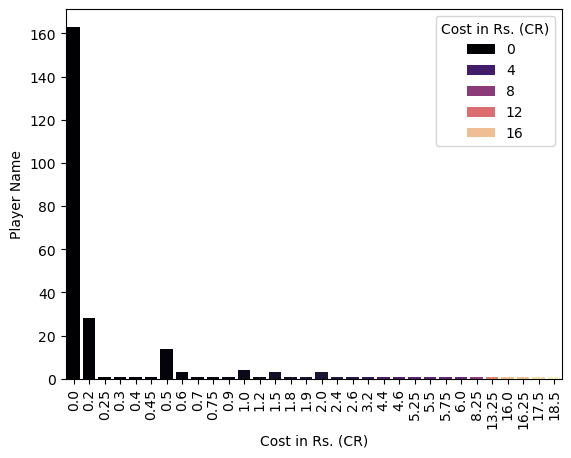

In [27]:
# plt.hist(player_dis_cr,bins=10,color = "red",ec='blue')
sns.barplot(x =player_dis_cr.index, y = player_dis_cr['Player Name'], hue= player_dis_cr.index, palette = 'magma', estimator = 'sum')
# sns.histplot(player_dis_cr, bins=10) # Directly uses bins
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '0.0'),
  Text(1, 0, '24.0'),
  Text(2, 0, '30.0'),
  Text(3, 0, '36.0'),
  Text(4, 0, '48.0'),
  Text(5, 0, '54.0'),
  Text(6, 0, '60.0'),
  Text(7, 0, '72.0'),
  Text(8, 0, '84.0'),
  Text(9, 0, '90.0'),
  Text(10, 0, '108.0'),
  Text(11, 0, '120.0'),
  Text(12, 0, '144.0'),
  Text(13, 0, '180.0'),
  Text(14, 0, '216.0'),
  Text(15, 0, '228.0'),
  Text(16, 0, '240.0'),
  Text(17, 0, '288.0'),
  Text(18, 0, '312.0'),
  Text(19, 0, '384.0'),
  Text(20, 0, '528.0'),
  Text(21, 0, '552.0'),
  Text(22, 0, '630.0'),
  Text(23, 0, '660.0'),
  Text(24, 0, '690.0'),
  Text(25, 0, '720.0'),
  Text(26, 0, '990.0'),
  Text(27, 0, '1590.0'),
  Text(28, 0, '1920.0'),
  Text(29, 0, '1950.0'),
  Text(30, 0, '2100.0'),
  Text(31, 0, '2220.0')])

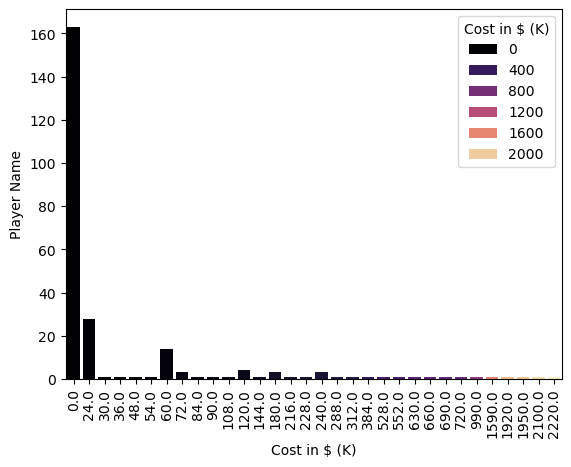

In [28]:
sns.barplot(x =player_dis_K.index, y = player_dis_K['Player Name'], hue= player_dis_K.index, palette = 'magma')
plt.xticks(rotation=90)

#### Mean, Median, and Most Expensive Player

In [29]:
print('\nAVG Player Price')
print(ipl.dataframe['Cost in Rs. (CR)'].mean(), "CR")
print(ipl.dataframe['Cost in $ (K)'].mean() * 1000, "$")
print('\nMEDIAN PLAYER PRICE')
print(ipl.dataframe['Cost in Rs. (CR)'].median(), "CR")
print('\nMOST EXPENSIVE PLAYER')
print("= {x} for {y} CR or {z} $\n\n".format(x = ipl.dataframe[ipl.dataframe['Cost in Rs. (CR)'] == ipl.dataframe['Cost in Rs. (CR)'].max()].loc[:, 'Player Name'].values, y =ipl.dataframe['Cost in Rs. (CR)'].max(), z = ipl.dataframe['Cost in $ (K)'].max() * 1000))

sorted_by_value = ipl.dataframe.sort_values('Cost in Rs. (CR)', ascending = False)
sorted_by_value.head()


AVG Player Price
0.6872427983539094 CR
82469.13580246914 $

MEDIAN PLAYER PRICE
0.0 CR

MOST EXPENSIVE PLAYER
= ['Sam Curran'] for 18.5 CR or 2220000.0 $




,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
97,Sam Curran,2.0,ALL-ROUNDER,18.50,2220.0,NaN,PBKS
144,Cameron Green,2.0,ALL-ROUNDER,17.50,2100.0,NaN,MI
25,Ben Stokes,2.0,ALL-ROUNDER,16.25,1950.0,NaN,CSK
119,Nicholas Pooran,2.0,WICKETKEEPER,16.00,1920.0,SRH,LSG
218,Harry Brook,1.5,BATSMAN,13.25,1590.0,NaN,SRH


### 4.3 Role/Type of Player Analysis and Bivariate Analysis

#### Player Type Distribution

([0, 1, 2, 3],
 [Text(0, 0, 'ALL-ROUNDER'),
  Text(1, 0, 'BATSMAN'),
  Text(2, 0, 'BOWLER'),
  Text(3, 0, 'WICKETKEEPER')])

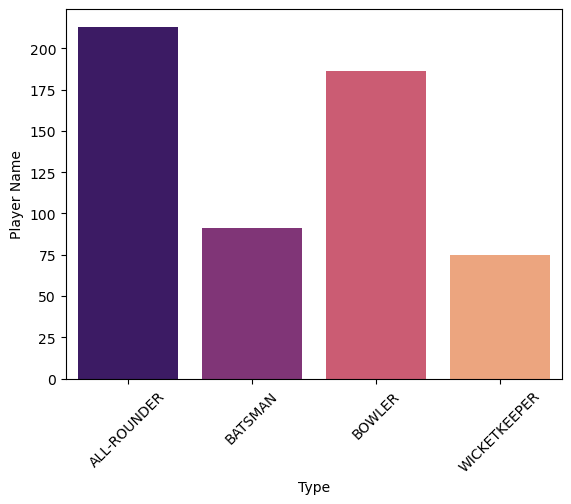

In [30]:
type_dist = ipl.dataframe.groupby('Type').agg({'Player Name':'count'})
sns.barplot(x = type_dist.index, y = type_dist['Player Name'], hue=type_dist.index, palette = 'magma')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'YEAR 2023')

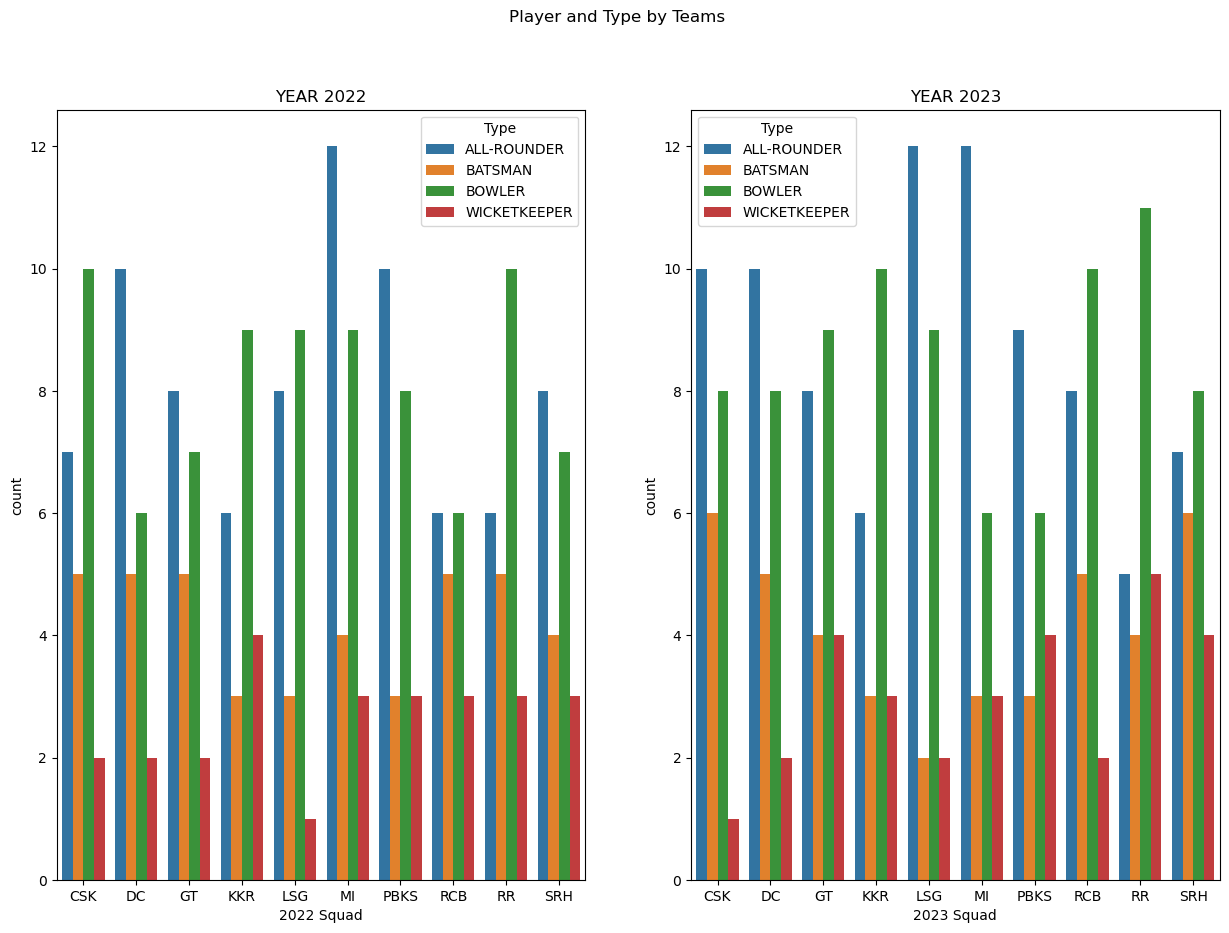

In [31]:
fig, axes = subplots(nrows = 1, ncols = 2, figsize = (15,10))
fig.suptitle("Player and Type by Teams ")

tempgroup = ipl.dataframe.groupby(['Type', '2022 Squad']).agg(count=('2022 Squad','count')).reset_index()
df1 = pd.pivot_table(tempgroup,values=['2022 Squad'],columns='Type',index='2022 Squad')
sns.barplot(ax=axes[0],data=tempgroup, x='2022 Squad', y='count', hue='Type')
axes[0].set_title('YEAR 2022')

tempgroup2 = ipl.dataframe.loc[ipl.dataframe['2023 Squad'] != 'Unsold'].groupby(['Type', '2023 Squad']).agg(count=('2023 Squad','count')).reset_index()
df2 = pd.pivot_table(tempgroup2,values=['2023 Squad'],columns='Type',index='2023 Squad')
sns.barplot(ax=axes[1],data=tempgroup2, x='2023 Squad', y='count', hue='Type')
axes[1].set_title('YEAR 2023')

#### Base Price Analysis for Player Type

In [32]:
# Sum / Player Type 
print('\nTOTAL SUM/ PLAYER TYPE')
print(ipl.dataframe.groupby('Type').agg({'Base Price':'sum'}))
print('\nAVG BASE/ PLAYER TYPE')
print(ipl.dataframe.groupby('Type').agg({'Base Price':'mean'}))
print('\nSTD DEV./ PLAYER TYPE')
print(ipl.dataframe.groupby('Type').agg({'Base Price':'std'}))
print('\nCALCULATE Coeff. of Variation')
print(ipl.dataframe.groupby('Type').agg({'Base Price':'std'})/ipl.dataframe.groupby('Type').agg({'Base Price':'mean'}))


TOTAL SUM/ PLAYER TYPE
              Base Price
Type                    
ALL-ROUNDER        58.45
BATSMAN            28.50
BOWLER             47.75
WICKETKEEPER       21.75

AVG BASE/ PLAYER TYPE
              Base Price
Type                    
ALL-ROUNDER     0.274413
BATSMAN         0.313187
BOWLER          0.256720
WICKETKEEPER    0.290000

STD DEV./ PLAYER TYPE
              Base Price
Type                    
ALL-ROUNDER     0.387408
BATSMAN         0.481366
BOWLER          0.347571
WICKETKEEPER    0.411901

CALCULATE Coeff. of Variation
              Base Price
Type                    
ALL-ROUNDER     1.411770
BATSMAN         1.536993
BOWLER          1.353891
WICKETKEEPER    1.420347


In [40]:
# Sum / Player Type 
print('\nTOTAL SUM/ PLAYER TYPE')
print(ipl.dataframe.groupby('Type').agg({'Cost in Rs. (CR)':'sum'}))
print('\nAVG BASE/ PLAYER TYPE')
print(ipl.dataframe.groupby('Type').agg({'Cost in Rs. (CR)':'mean'}))
print('\nSTD DEV./ PLAYER TYPE')
print(ipl.dataframe.groupby('Type').agg({'Cost in Rs. (CR)':'std'}))
print('\nCALCULATE Coeff. of Variation')
print(ipl.dataframe.groupby('Type').agg({'Cost in Rs. (CR)':'std'})/ipl.dataframe.groupby('Type').agg({'Cost in Rs. (CR)':'mean'}))


TOTAL SUM/ PLAYER TYPE
              Cost in Rs. (CR)
Type                          
ALL-ROUNDER              70.75
BATSMAN                  36.50
BOWLER                   32.15
WICKETKEEPER             27.60

AVG BASE/ PLAYER TYPE
              Cost in Rs. (CR)
Type                          
ALL-ROUNDER           0.813218
BATSMAN               0.890244
BOWLER                0.378235
WICKETKEEPER          0.920000

STD DEV./ PLAYER TYPE
              Cost in Rs. (CR)
Type                          
ALL-ROUNDER           3.241469
BATSMAN               2.520075
BOWLER                1.041132
WICKETKEEPER          3.023945

CALCULATE Coeff. of Variation
              Cost in Rs. (CR)
Type                          
ALL-ROUNDER           3.985976
BATSMAN               2.830769
BOWLER                2.752603
WICKETKEEPER          3.286896


- All-Rounders contribute the highest total earnings among all player types. However, their income shows the greatest variation, as indicated by the highest standard deviation (3.24) and a Coefficient of Variation (CV) of nearly 400%. This suggests that while some All-Rounders earn very high salaries, others are paid significantly less.

- Batsmen hold the second-highest average income. Their variation is relatively low compared to All-Rounders, indicating more consistent salaries within this group.

- Bowlers have the lowest average earnings, but they also exhibit the least variation, showing that their salaries are more stable and uniform across players.

- Wicketkeepers represent the smallest group in terms of player count and total earnings. Interestingly, they record the highest average income, though their variation is still quite large, suggesting a mix of both high-paid and lower-paid players in this category.

### 4.4 Team Composition (2022 vs 2023)

#### Total Player for Every Squad

In [33]:
# manipulate data for squad cost
cost_df = ipl.dataframe.copy()
cost_df['2023 Squad'] = np.where(cost_df['2023 Squad'] == 'Unsold', 
                           cost_df['2022 Squad'], 
                           cost_df['2023 Squad'])

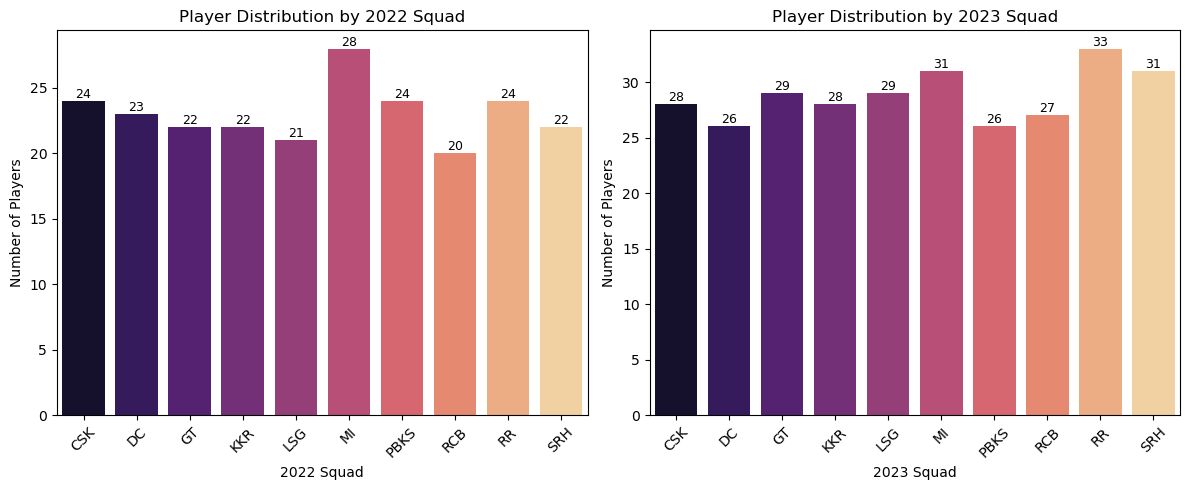

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Data agregasi
dist_2022 = cost_df.groupby('2022 Squad').agg({'Player Name':'count'}).reset_index()
dist_2023 = cost_df.groupby('2023 Squad').agg({'Player Name':'count'}).reset_index()

# Plot 2022
sns.barplot(
    data=dist_2022,
    x='2022 Squad', y='Player Name',
    hue='2022 Squad', palette='magma',
    ax=ax[0], legend=False
)
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize = 9)
ax[0].set_xlabel("2022 Squad")
ax[0].set_ylabel("Number of Players")
ax[0].set_title("Player Distribution by 2022 Squad")
ax[0].tick_params(axis='x', rotation=45)

# Plot 2023
sns.barplot(
    data=dist_2023,
    x='2023 Squad', y='Player Name',
    hue='2023 Squad', palette='magma',
    ax=ax[1], legend=False
)
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize = 9)
ax[1].set_xlabel("2023 Squad")
ax[1].set_ylabel("Number of Players")
ax[1].set_title("Player Distribution by 2023 Squad")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


* 322 player is retained by their previous team

#### SQUAD COST BY EVERY TEAM

In [35]:
ipl.dataframe.columns

Index(['Player Name', 'Base Price', 'Type', 'Cost in Rs. (CR)',
       'Cost in $ (K)', '2022 Squad', '2023 Squad'],
      dtype='object')

In [36]:
ipl.dataframe[(ipl.dataframe['2023 Squad'] == 'Unsold')]

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
243,Tom Banton,2.0,WICKETKEEPER,NaN,NaN,NaN,Unsold
244,Kusal Mendis,0.5,WICKETKEEPER,NaN,NaN,NaN,Unsold
245,Chris Jordan,2.0,BOWLER,NaN,NaN,CSK,Unsold
246,Adam Milne,2.0,BOWLER,NaN,NaN,CSK,Unsold
247,Mujeeb Rahman,1.0,BOWLER,NaN,NaN,NaN,Unsold
...,...,...,...,...,...,...,...
563,Dhruv Patel,0.2,ALL-ROUNDER,NaN,NaN,NaN,Unsold
564,Jack Prestwidge,0.2,ALL-ROUNDER,NaN,NaN,NaN,Unsold
565,Aditya Sarvate,0.2,ALL-ROUNDER,NaN,NaN,NaN,Unsold
566,Sagar Solanki,0.2,ALL-ROUNDER,NaN,NaN,NaN,Unsold


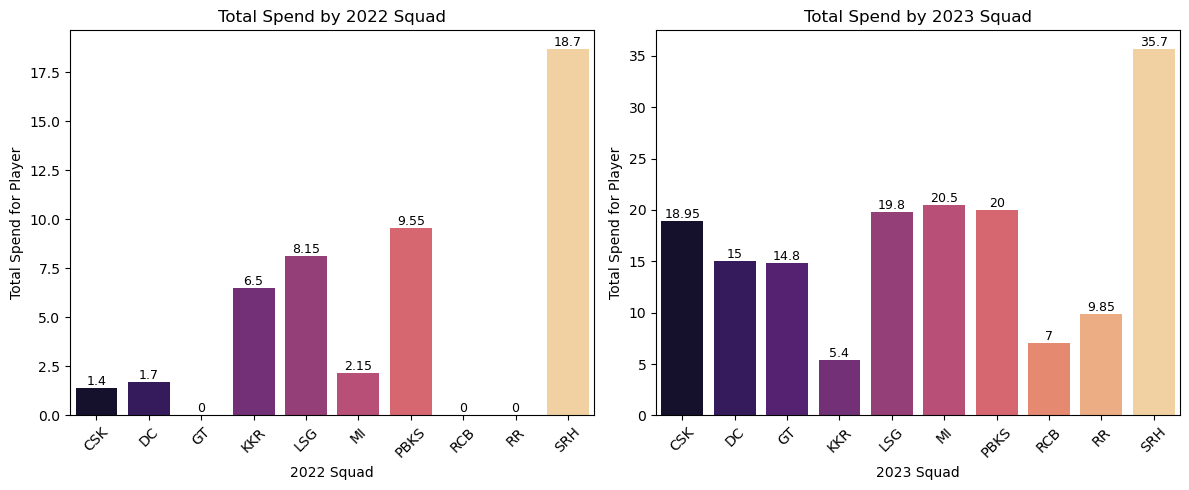

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Data agregasi
cost_2022 = cost_df.groupby('2022 Squad').agg({'Cost in Rs. (CR)':'sum'}).reset_index()
cost_2023 = cost_df.groupby('2023 Squad').agg({'Cost in Rs. (CR)':'sum'}).reset_index()

# Plot 2022
sns.barplot(
    data=cost_2022,
    x='2022 Squad', y='Cost in Rs. (CR)',
    hue='2022 Squad', palette='magma',
    ax=ax[0], legend=False
)
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize = 9)
ax[0].set_xlabel("2022 Squad")
ax[0].set_ylabel("Total Spend for Player")
ax[0].set_title("Total Spend by 2022 Squad")
ax[0].tick_params(axis='x', rotation=45)

# Plot 2023
sns.barplot(
    data=cost_2023,
    x='2023 Squad', y='Cost in Rs. (CR)',
    hue='2023 Squad', palette='magma',
    ax=ax[1], legend=False
)
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize = 9)
ax[1].set_xlabel("2023 Squad")
ax[1].set_ylabel("Total Spend for Player")
ax[1].set_title("Total Spend by 2023 Squad")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'YEAR 2023')

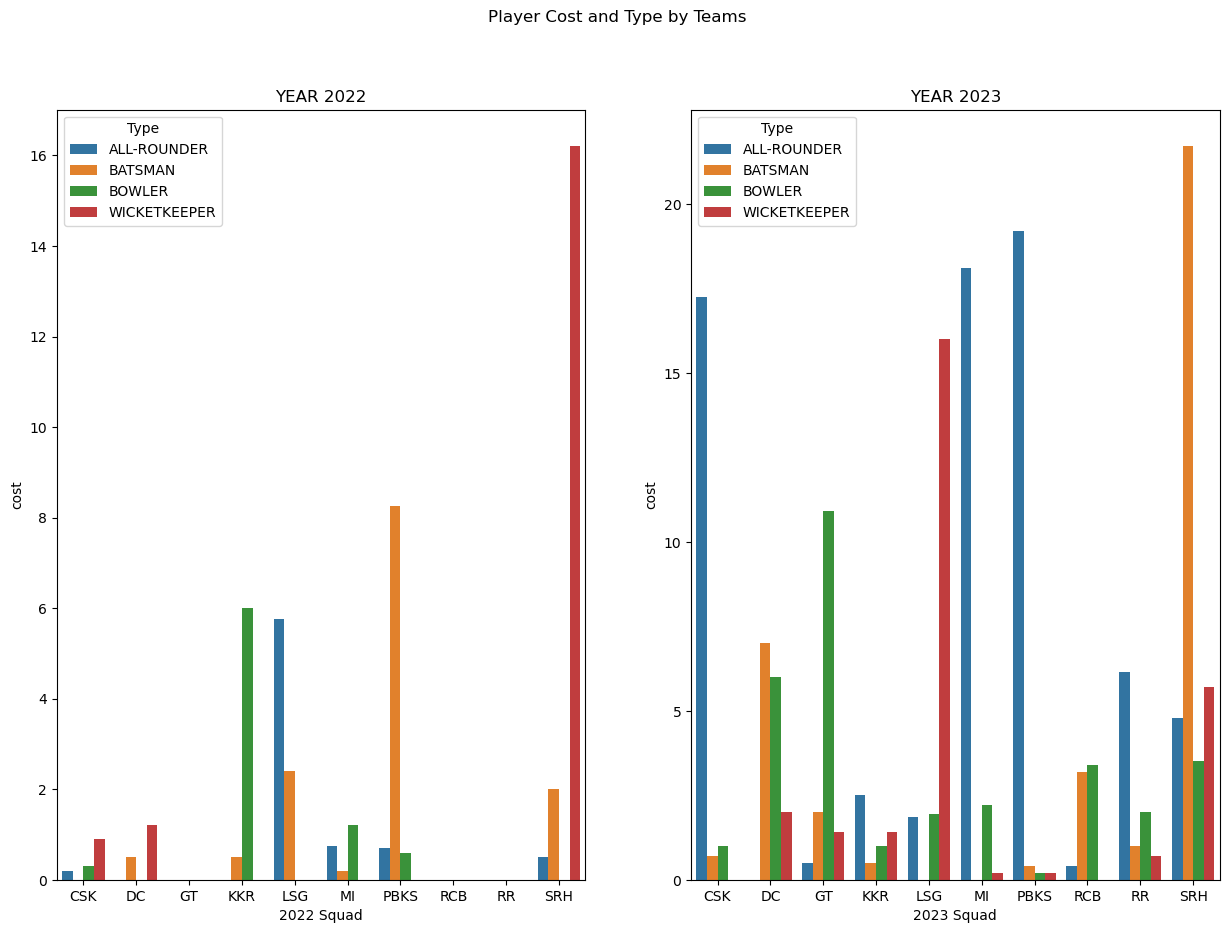

In [38]:
fig, axes = subplots(nrows = 1, ncols = 2, figsize = (15,10))
fig.suptitle("Player Cost and Type by Teams ")

tempgroup = cost_df.groupby(['Type', '2022 Squad']).agg(cost=('Cost in Rs. (CR)','sum')).reset_index()
df1 = pd.pivot_table(tempgroup,values=['2022 Squad'],columns='Type',index='2022 Squad')
sns.barplot(ax=axes[0],data=tempgroup, x='2022 Squad', y='cost', hue='Type')
axes[0].set_title('YEAR 2022')


tempgroup2 = cost_df.loc[ipl.dataframe['2023 Squad'] != 'Unsold'].groupby(['Type', '2023 Squad']).agg(cost = ('Cost in Rs. (CR)','sum')).reset_index()
df2 = pd.pivot_table(tempgroup2,values=['2023 Squad'],columns='Type',index='2023 Squad')
sns.barplot(ax=axes[1],data=tempgroup2, x='2023 Squad', y='cost', hue='Type')
axes[1].set_title('YEAR 2023')


In [39]:
print('\nTeam Average Spending Per Player (2022)')
print(cost_df.groupby('2022 Squad').agg({'Cost in Rs. (CR)':'mean'}).sort_values(by = ['Cost in Rs. (CR)'], ascending = False))
print('\nTeam Average Spending Per Player (2023)')
print(cost_df.groupby('2023 Squad').agg({'Cost in Rs. (CR)':'mean'}).sort_values(by = ['Cost in Rs. (CR)'], ascending = False))


Team Average Spending Per Player (2022)
            Cost in Rs. (CR)
2022 Squad                  
SRH                 1.168750
LSG                 0.479412
PBKS                0.477500
KKR                 0.406250
MI                  0.102381
DC                  0.077273
CSK                 0.066667
GT                  0.000000
RCB                 0.000000
RR                  0.000000

Team Average Spending Per Player (2023)
            Cost in Rs. (CR)
2023 Squad                  
SRH                 1.428000
PBKS                0.909091
MI                  0.854167
LSG                 0.792000
CSK                 0.758000
DC                  0.600000
GT                  0.592000
RR                  0.394000
RCB                 0.280000
KKR                 0.245455


* SRH remains the most expensive team for the second consecutive year
* KKR shows efficiency through decreased player expenditure.
* SRH shifted their main spending on player roles, changing their largest expenditure from WICKETKEEPER in 2022 to BATSMAN.

## 5. DATA INSIGHT

### 5.1 Which players are the most costliest buys?

In [41]:
sorted_by_value = ipl.dataframe.sort_values('Cost in Rs. (CR)', ascending = False)
sorted_by_value.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
97,Sam Curran,2.0,ALL-ROUNDER,18.50,2220.0,NaN,PBKS
144,Cameron Green,2.0,ALL-ROUNDER,17.50,2100.0,NaN,MI
25,Ben Stokes,2.0,ALL-ROUNDER,16.25,1950.0,NaN,CSK
119,Nicholas Pooran,2.0,WICKETKEEPER,16.00,1920.0,SRH,LSG
218,Harry Brook,1.5,BATSMAN,13.25,1590.0,NaN,SRH


### 5.2 Which players were the cheapest buys this season and which team bought them?

In [42]:
sorted_by_value = ipl.dataframe.sort_values('Cost in Rs. (CR)', ascending = True)
sorted_by_value.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
7,Rahul Tewatia,0.0,ALL-ROUNDER,0.0,0.0,GT,GT
14,Vijay Shankar,0.0,ALL-ROUNDER,0.0,0.0,GT,GT
13,Wriddhiman Saha,0.0,WICKETKEEPER,0.0,0.0,GT,GT
12,Noor Ahmad,0.0,BOWLER,0.0,0.0,GT,GT
11,Yash Dayal,0.0,BOWLER,0.0,0.0,GT,GT


#### Rahul Tewatia from GT with *ALL-ROUNDER* Type

### 5.3 Draw a Bargraph showing How much money was spent by each team this season overall.

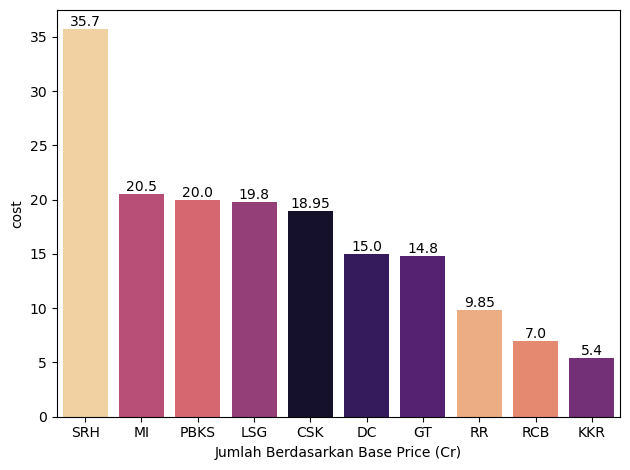

In [43]:
counts = ipl.dataframe['Cost in Rs. (CR)'].sum()


team_expense = ipl.dataframe.loc[ipl.dataframe['2023 Squad'] != 'Unsold'].groupby(['2023 Squad']).agg(cost = ('Cost in Rs. (CR)','sum'))


ax = sns.barplot(x = team_expense.index, y = team_expense.cost, hue= team_expense.index, palette = 'magma', 
                 order= team_expense.sort_values(['cost'],ascending = False).index
                )
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height()}',
            ha='center', va='bottom')
# plt.xticks(rotation=45)
plt.xlabel("Jumlah Berdasarkan Base Price (Cr)")
plt.tight_layout()

### 5.4 How many bowler remained unsold and what was their base price?

In [44]:
unsold_bowler = ipl.dataframe.loc[(ipl.dataframe['2023 Squad'] == 'Unsold') & (ipl.dataframe['Type'] == 'BOWLER')]
# unsold_bowler['Base Price'].count()

print("There were {a} player remain unsold in the auction \n".format(a = unsold_bowler['Base Price'].count()))
print("Their range price ranged from {a} to {b} million".format(a = (unsold_bowler['Base Price'].min())*10, b = 10*(unsold_bowler['Base Price'].max())))

There were 101 player remain unsold in the auction 

Their range price ranged from 1.5 to 20.0 million


### 5.5 HOW MANY PLAYER REMAIN UNSOLD THIS SEASON (2023 SEASON)

In [45]:
x = ipl.dataframe[(ipl.dataframe['2023 Squad'] == 'Unsold')].count()
print("Player Remains Unsold This Season {}".format(x['Base Price']))

Player Remains Unsold This Season 322


### 5.6 Which type of players were majorly unsold?

In [46]:
print("TYPE OF PLAYER MAJORLY UNSOLD \n")
print(ipl.dataframe[(ipl.dataframe['2023 Squad'] == 'Unsold')].groupby('Type').agg({'2023 Squad':'count'}))

TYPE OF PLAYER MAJORLY UNSOLD 

              2023 Squad
Type                    
ALL-ROUNDER          126
BATSMAN               50
BOWLER               101
WICKETKEEPER          45


### 5.7 What is total money spent by all teams in dollars?

In [47]:
ipl.dataframe['Cost in $ (K)'].sum() * 1000

np.float64(20040000.0)

## Key Insights & Conclusion

1. Top Valued Players Are All-Rounders
The three most expensive players in the 2023 auction are all-rounders, highlighting their strategic importance as they provide both batting and bowling capabilities, making them highly valuable assets for team balance.

2. Extreme Cost Gap in Player Market
While the average player cost is only 0.64 CR (USD 82,500), Sam Curran’s record contract at 18.5 CR (USD 2.22M) shows how exceptional talent can command disproportionately high prices. This indicates a highly skewed player market where star power and versatility drive bidding wars.

3. All-Rounders and Bowlers Dominate Team Composition
Both all-rounders and bowlers show the highest counts and average base prices, confirming their essential role in team strategies. However, their cost variability suggests inconsistent valuation across franchises, possibly influenced by team-specific needs and auction dynamics.

4. Strong Player Retention Across Seasons
A total of 322 players were retained from 2022 to 2023, showing a relatively high level of squad stability across franchises. This reflects trust in existing squads and limited drastic changes.

5. Team Composition Strategies Differ

    - Rajasthan Royals (RR) retained the largest squad size, signaling a preference for depth over marquee signings.
    
    - Sunrisers Hyderabad (SRH) recorded the highest spending for two consecutive years, with 2023 investments particularly focused on bowlers. Despite this, their largest cost allocation was on batsmen, showing a dual strategy of strengthening both offense and defense.
    
    - Kolkata Knight Riders (KKR) demonstrated efficiency, reducing average player cost from 0.40 CR in 2022 to just 0.245 CR in 2023 while still adding new players. This suggests a cost-optimization strategy without sacrificing squad renewal.

6. Unsold Players Reflect Market Saturation
The largest group of unsold players came from all-rounders and bowlers. This could imply two scenarios:

    - Oversupply of talent in these categories, lowering demand; or
    
    - Teams being selective, only willing to pay premium for top-tier talent.
Further performance-based analysis is needed to clarify whether this trend reflects undervaluation or saturation.

## 📌 Business Implication

* Teams are clearly willing to pay premium for multi-skilled players (all-rounders), suggesting that upcoming talents with dual abilities can position themselves as high-value assets.

* The wide disparity in player cost highlights market inefficiency; franchises with strong scouting may find hidden gems at lower costs, gaining a competitive advantage.

* Retention patterns indicate that stability is as important as star signings—teams that maintain core players may build better long-term cohesion.

* For analysts and management, studying unsold players could reveal undervalued opportunities or indicate surplus positions that can be avoided in future drafts.